

# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

TMDb movie data (cleaned from original data on Kaggle)
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

id        - Movie ID                 
imdb_id   - Internet Movie Database ID      
popularity - Ratings among viewers                
budget     - Cost of production                
revenue    - Profit generated                
original_title - Name of movie            
cast          - Lead actors/actresses            
homepage                
director                  
tagline                 
keywords                
overview                   
runtime                    
genres        - Categories of movies            
production_companies   - Company handling movie pproduction 
release_date       - Date made available to public        
vote_count                 
vote_average               
release_year        - Yearmade available to public      
budget_adj                 
revenue_adj      



## Question(s) for Analysis
**1. Which movie lengths are more popular with viewers?**

**2. Which movie genres have the higest and lowest budgets?**

In [6]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


### General Properties

Read the data in the csv file using the pandas `pd.read_csv()` function

In [7]:
movies_df = pd.read_csv('tmdb-movies.csv')
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Use the `.info()` function to get an overview of the content of the dataset. Important information such as column names and total number of columns will be shown here. 

In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the information above (under `Non-null Count` column), it can be intuitively inferred that null values exist in the dataset. To take a closer look, and have a firm grasp of its magnitude, we use the `.isna().sum()` function to get a count of the nulss present in the columns of the dataset.

In [10]:
# Obtain counts of null values within each column
movies_df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

To further ensure the integrity of data, we inspect the dataset for duplicate rows

In [18]:
# Use the .duplicated() function to count number of duplicate rows in dataset
movies_df.duplicated().sum()

1

Observation: The budget column contain rows that have value of 0. This is unusual, as movies require budget/funds to be produced.

Next, let's find out how many of such rows exist

In [31]:
# Checking the number of 0 values in the 'budget' column
movies_df[(movies_df['budget']==0)].shape[0]

5696

There are 5696 rows or movies with 0 budget value. This is a lot and will affect our analysis.

Filling that amount of rows with mean or related statistical summaries can greatly skew results owing to the sheer number of rows to be filled.
Therefore these rows will be dropped (whhen cleaning data)


## Data Cleaning


> From the inspection conducted on the dataset in the previous sections, issues raised will be resolved in the following order:
 
> 1. To bin columns not relevant to our analysis, so we can have more control over our dataset
> 2. Remove the duplicate row found in the dataset
> 3. Drop rows under budget column with 0 value
 

### #1. Removing Irrelevant Columns
> As stated earlier, we will be using some (10 precisely) columns like `popularity` `revenue` `budget`  `release_year` `vote_average`, etc. out of the 21 columns in the dataset.
The remaining 11 columns will be dropped. 

>This can be done using the `.drop()` function.

In [99]:
# Drop the columns, and then inspect the shape of the dataset afterwards. You shoud have 7 columns left to work with
movies_df.drop(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'vote_count', 'revenue_adj'],axis =1,inplace = True)


In [100]:
# The specified columns have been dropped
movies_df.shape

(10866, 10)

### #2. Deleting Duplicate Rows

> Since there is only one duplicate row in the data set, it can be dropped.
This is done using the `.drop_duplicates()` function

In [101]:
# Drop duplicate rows and inspect the shape. N/B: There are now 10865 rows 
# as compared to the initial 10866 rows.
movies_df.drop_duplicates(inplace = True)
movies_df.shape

(10865, 10)

### #3. Drop rows with Unusual/Incorrect Values
> As discusssed earlier in the wrangling phase, certain columns, like the `budget` column has a lot of rows where the value is filled as 0. These rows will consequently be deleted, as working with them might lead to inconclusive/wrong results.

In [53]:
# Drop rows which have 0 value under budget column, and then inspect shape.
movies_df.drop(movies_df.index[movies_df['budget']==0],axis =0,inplace = True)

In [55]:
movies_df.shape

(5169, 7)

We are now left with 7 columns of 5169 which are relevant to our investigations to work with.

<a id='eda'></a>
## Exploratory Data Analysis




In [ ]:
#few extra imports for visualizations
pip install bokeh

import bokeh.io
from bokeh.resources import INLINE
bokeh.io.output_notebook(INLINE)

from bokeh.palettes import Spectral7
from bokeh.models import Title

from bokeh.plotting import figure, output_notebook, show
from bokeh.io import output_notebook

## Research Question 1 - In what ways does a movie's budget relate to its revenue, popularity, and vote average?

In this analysis, we try to examine what relationship(s) exist between a movie's popularity or vote average and it's budget.
We will also seek to estableish what correlation exist between a movie's budget and it's revenue.



### Comparing budget and revenue

Here, we seek to establish iif there is a strong relationship between movie revenue and budget. 
**Pandas** and **bokeh** will be used predominantly for visualizations.

<AxesSubplot:>

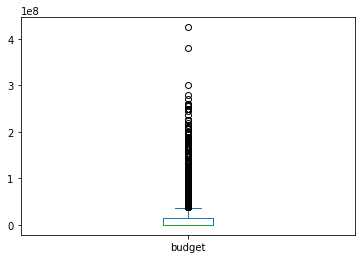

In [96]:
movies_df['budget'].plot(kind = 'box')

Potentially high amount of outliers.

In [8]:
# Create a scatter plot for the variables

# Define plot parameters and assign to a variable, plot.
plot = figure(
    title= 'Comparing Budget and Revenue',
    width=500, height=300)

plot.add_layout(Title(text="Budget", align="center"), "below")
plot.add_layout(Title(text="Revenue", align="center"), "left")


# Call '.circle' method in bokeh and define its  parameters.
plot.circle(movies_df.budget, movies_df.revenue, size=12, alpha=0.2)


GlyphRenderer(id='1073', ...)

In [11]:
# Display plot
show(plot)

Generally, although the corellation is weak, it tends to show that a fair number of mid-to-high budget movies usually generate higher revenue.

### Budget vs Popularity
Are high budget-movies generally popular with the public (or vice versa)? We compare both variables in this section to find out!

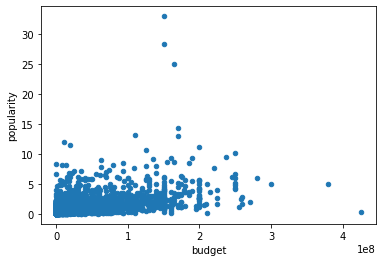

In [20]:
# Scatter plot of budget against popularity
movies_df.plot(x='budget', y= 'popularity', kind = 'scatter');

### Revenue and Vote average compared
Do movies with high or low budgets recieve higher or lower votes on averge, respectively?

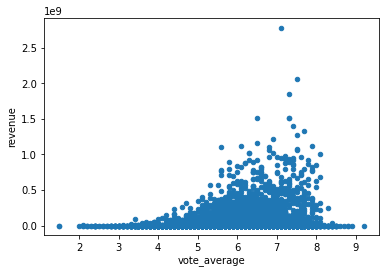

In [21]:
# Scatter plot of Revenue against Vote average
movies_df.plot(x='vote_average', y= 'revenue', kind = 'scatter');

Negatively skewed scatter plot.

Also, higher vote average (7-8) tend to be consistent with movies with high revenue returns.


## Research Question 2 - What relationships csn be discovered by comparing Revenue with  Popularity and Vote average? 



Next, we place **Revenue** side by side with other variables as **Release yaer** and **Popularity**, and see how they are related.

<AxesSubplot:>

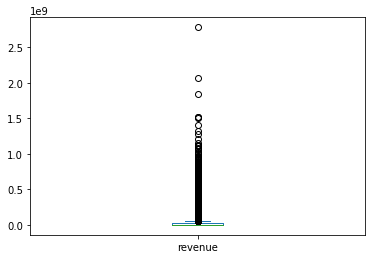

In [98]:
# Create a box plot and visualize outliers
movies_df['revenue'].plot(kind = 'box')

Potentially high amount of outliers.

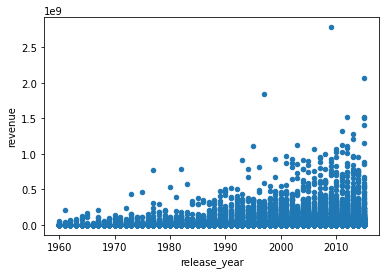

In [31]:
# Scatter plot of Revenue vs Release year
movies_df.plot(x='release_year', y= 'revenue', kind = 'scatter');

Movie revenue tend to increase as the years(of release) increases.

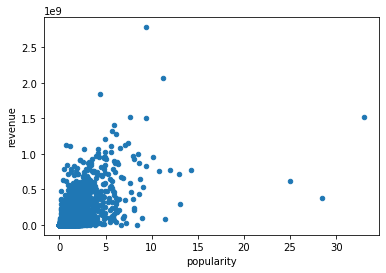

In [66]:
# Scatter plot of Revenue against Popularity
movies_df.plot(x='popularity', y= 'revenue', kind = 'scatter');

No strong correlation observed above.

<AxesSubplot:ylabel='Frequency'>

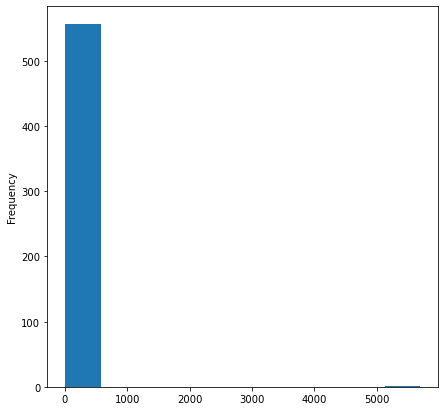

In [83]:
# histogram of movie revenues
movies_df['revenue'].value_counts().plot(kind='hist', figsize=(7,7))

Histogram above shows revenue to be positively(right) skewed

<a id='conclusions'></a>
## Conclusions

> * Movies with high budgets correlate positively with movies than turn over high revenue.
> * Movies between 100,000,000 - 200,000,000 budget range tend to be popular.
> * High vote average correlate with higher revenue for movies.
> * There is marked increase in revenue as the years increase (1960 through 2010 apprx.)
### Limitation(s)
> * The dataset analysed are almost half of the initial rows provided. This was necessitated by the need to drop rows which could not be effectively transformed for use.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])